In [2]:
# import dependencies 

# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
import datetime as dt 
from prophet import Prophet
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# plt.style.available
plt.style.use("seaborn-whitegrid")

In [3]:
# read in the csv 

qqq_df = pd.read_csv('QQQ.csv')
qqq_df



,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-03-10,51.125000,51.156250,50.281250,51.062500,44.090477,5232000
1,1999-03-11,51.437500,51.734375,50.312500,51.312500,44.306343,9688600
2,1999-03-12,51.125000,51.156250,49.656250,50.062500,43.226997,8743600
3,1999-03-15,50.437500,51.562500,49.906250,51.500000,44.468227,6369000
4,1999-03-16,51.718750,52.156250,51.156250,51.937500,44.846008,4905800
...,...,...,...,...,...,...,...
5859,2022-06-21,278.750000,283.450012,278.640015,281.079987,281.079987,51633700
5860,2022-06-22,278.519989,285.179993,277.910004,280.670013,280.670013,67472900
5861,2022-06-23,283.209991,285.720001,280.309998,284.850006,284.850006,57457800
5862,2022-06-24,287.739990,295.040009,287.500000,294.609985,294.609985,58324100


In [4]:
# Remove rows that have at least 1 null value.
for column in qqq_df.columns:
    print(f"{column} has {qqq_df[column].isnull().sum()} null values")

qqq_df.dropna()


Date has 0 null values
Open has 0 null values
High has 0 null values
Low has 0 null values
Close has 0 null values
Adj Close has 0 null values
Volume has 0 null values


,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-03-10,51.125000,51.156250,50.281250,51.062500,44.090477,5232000
1,1999-03-11,51.437500,51.734375,50.312500,51.312500,44.306343,9688600
2,1999-03-12,51.125000,51.156250,49.656250,50.062500,43.226997,8743600
3,1999-03-15,50.437500,51.562500,49.906250,51.500000,44.468227,6369000
4,1999-03-16,51.718750,52.156250,51.156250,51.937500,44.846008,4905800
...,...,...,...,...,...,...,...
5859,2022-06-21,278.750000,283.450012,278.640015,281.079987,281.079987,51633700
5860,2022-06-22,278.519989,285.179993,277.910004,280.670013,280.670013,67472900
5861,2022-06-23,283.209991,285.720001,280.309998,284.850006,284.850006,57457800
5862,2022-06-24,287.739990,295.040009,287.500000,294.609985,294.609985,58324100


In [5]:
qqq_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
qqq_df.count()

Date         5864
Open         5864
High         5864
Low          5864
Close        5864
Adj Close    5864
Volume       5864
dtype: int64

In [7]:
# Checking for duplicates 

print(f"Duplicate entries: {qqq_df.duplicated().sum()}")

Duplicate entries: 0


In [8]:
qqq_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5.864000e+03
mean,98.910110,99.724066,97.983628,98.900664,93.716304,6.756851e+07
std,86.243563,86.871757,85.509204,86.246159,87.183779,5.078043e+07
min,19.940001,20.530001,19.760000,20.059999,17.321026,3.302000e+06
25%,41.279999,41.650002,40.847499,41.225000,36.020123,2.993032e+07
50%,61.810000,62.570000,61.111250,61.953125,54.261280,5.539185e+07
75%,116.485002,117.082500,115.792498,116.612501,111.504757,9.117342e+07
max,405.570007,408.709991,402.579987,403.989990,402.208679,6.167723e+08


In [9]:
# Create a copy to avoid the SettingWarning .loc issue 
qqq_df = qqq_df.copy()
# Change to datetime datatype.
qqq_df.loc[:, 'Date'] = pd.to_datetime(qqq_df.loc[:,'Date'], format="%Y/%m/%d")

In [10]:
qqq_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

Text(0.5, 1.0, 'QQQ High Price History')

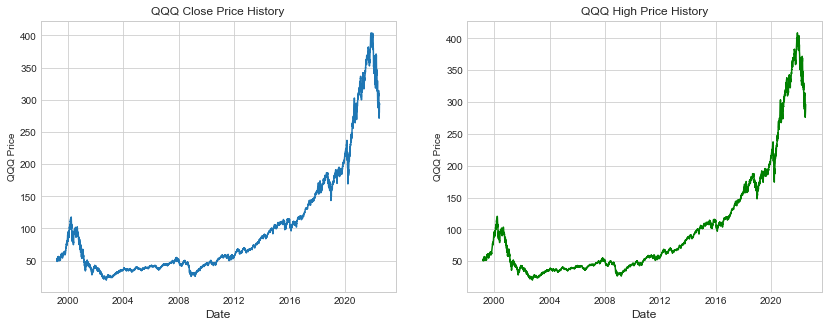

In [11]:
# Plots 
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(qqq_df["Date"], qqq_df["Close"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("QQQ Price")
ax1.set_title("QQQ Close Price History")

# Second Subplot
ax2.plot(qqq_df["Date"], qqq_df["High"], color="green")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("QQQ Price")
ax2.set_title("QQQ High Price History")


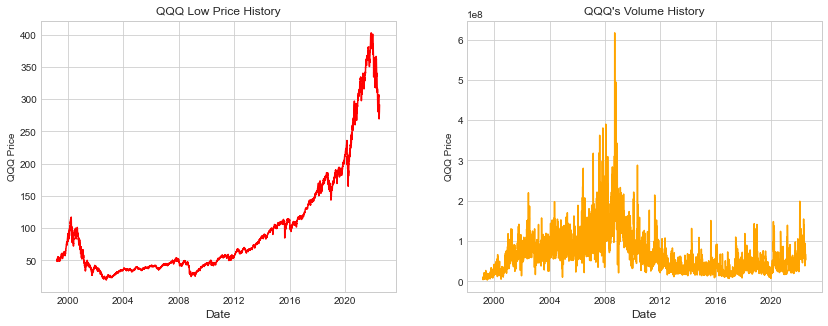

In [12]:
f, (ax3, ax4) = plt.subplots(1, 2, figsize=(14,5))

# Third Subplot
ax3.plot(qqq_df["Date"], qqq_df["Low"], color="red")
ax3.set_xlabel("Date", fontsize=12)
ax3.set_ylabel("QQQ Price")
ax3.set_title("QQQ Low Price History")

# Fourth Subplot
ax4.plot(qqq_df["Date"], qqq_df["Volume"], color="orange")
ax4.set_xlabel("Date", fontsize=12)
ax4.set_ylabel("QQQ Price")
ax4.set_title("QQQ's Volume History")
plt.show()

In [13]:
qqq_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-03-10,51.12500,51.156250,50.28125,51.0625,44.090477,5232000
1,1999-03-11,51.43750,51.734375,50.31250,51.3125,44.306343,9688600
2,1999-03-12,51.12500,51.156250,49.65625,50.0625,43.226997,8743600
3,1999-03-15,50.43750,51.562500,49.90625,51.5000,44.468227,6369000
4,1999-03-16,51.71875,52.156250,51.15625,51.9375,44.846008,4905800


In [14]:
# We will use Facebook's library 'Prophet' for times series forecasting 
# Replace closing price with 'y' and Date with 'ds'
# Fit the dataframe with Prophet in order to detect future patterns 
# We will predict the upper and lower prices of the closing price

m = Prophet()

# Drop the columns
ph_df = qqq_df.drop(['Open', 'High', 'Low','Volume', 'Adj Close'], axis=1)
ph_df.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

ph_df.head()

,ds,y
0,1999-03-10,51.0625
1,1999-03-11,51.3125
2,1999-03-12,50.0625
3,1999-03-15,51.5000
4,1999-03-16,51.9375


In [27]:
results = pd.DataFrame()

for i in range(1,27):
    df = qqq_df[qqq_df['Date']< dt.datetime(2022,6,i)]
    m = Prophet()

# Drop the columns
    ph_df = df.drop(['Open', 'High', 'Low','Volume', 'Adj Close'], axis=1)
    ph_df.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)
    m.fit(ph_df)
    future_prices = m.make_future_dataframe(periods=1)
    forecast = m.predict(future_prices)
    results = results.append(forecast)
    

18:56:09 - cmdstanpy - INFO - Chain [1] start processing
18:56:13 - cmdstanpy - INFO - Chain [1] done processing
18:56:17 - cmdstanpy - INFO - Chain [1] start processing
18:56:20 - cmdstanpy - INFO - Chain [1] done processing
18:56:25 - cmdstanpy - INFO - Chain [1] start processing
18:56:30 - cmdstanpy - INFO - Chain [1] done processing
18:56:34 - cmdstanpy - INFO - Chain [1] start processing
18:56:38 - cmdstanpy - INFO - Chain [1] done processing
18:56:43 - cmdstanpy - INFO - Chain [1] start processing
18:56:47 - cmdstanpy - INFO - Chain [1] done processing
18:56:51 - cmdstanpy - INFO - Chain [1] start processing
18:56:55 - cmdstanpy - INFO - Chain [1] done processing
18:56:59 - cmdstanpy - INFO - Chain [1] start processing
18:57:03 - cmdstanpy - INFO - Chain [1] done processing
18:57:08 - cmdstanpy - INFO - Chain [1] start processing
18:57:12 - cmdstanpy - INFO - Chain [1] done processing
18:57:17 - cmdstanpy - INFO - Chain [1] start processing
18:57:21 - cmdstanpy - INFO - Chain [1]

In [28]:
results[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5859,2022-06-21,365.228170,347.434459,383.639934
5860,2022-06-22,365.542570,347.097963,383.577840
5861,2022-06-23,365.814269,346.633250,384.584854
5862,2022-06-24,365.964066,347.915334,384.214159
5863,2022-06-25,367.299383,349.837448,386.357238


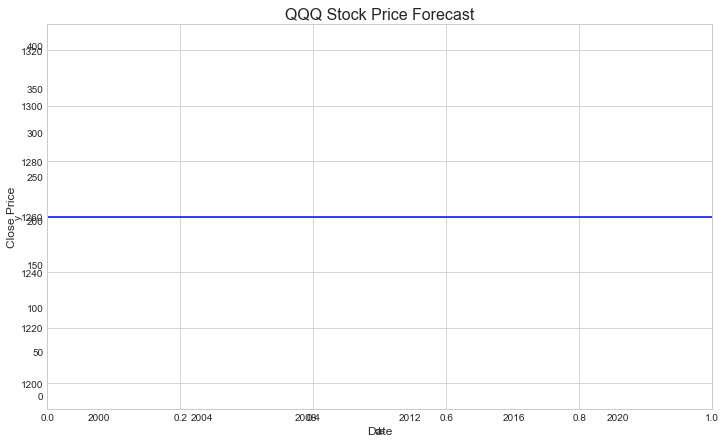

In [30]:
import matplotlib.dates as mdates

# Dates
starting_date = dt.datetime(2022, 4, 7)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2022, 6, 7)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2022, 2, 18)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Learn more Prophet tomorrow and plot the forecast for amazon.
fig = m.plot(results)
ax1 = fig.add_subplot(111)
ax1.set_title("QQQ Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 1350), xytext=(starting_date1,1700),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )

# Trend emphasis arrow
ax1.annotate('Upward Trend', xy=(trend_date1, 1225), xytext=(trend_date1,950),
            arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
            )

ax1.axhline(y=1260, color='b', linestyle='-')

plt.show()

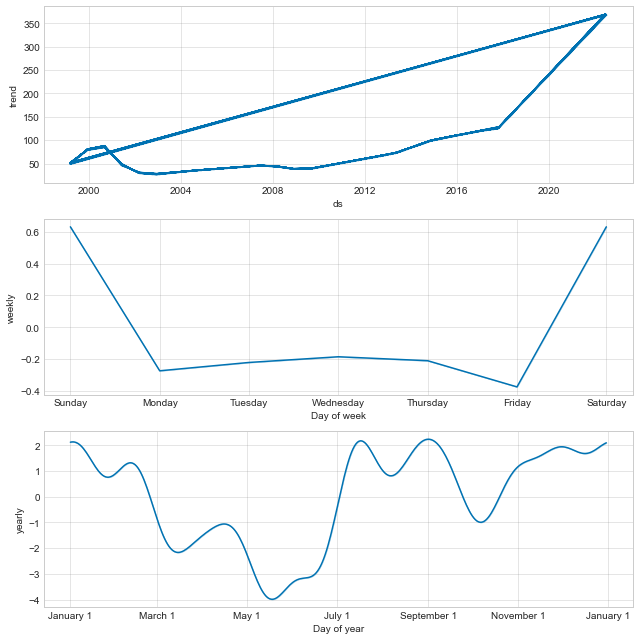

In [29]:
fig2 = m.plot_components(results)
plt.show()

19:08:16 - cmdstanpy - INFO - Chain [1] start processing
19:08:18 - cmdstanpy - INFO - Chain [1] done processing


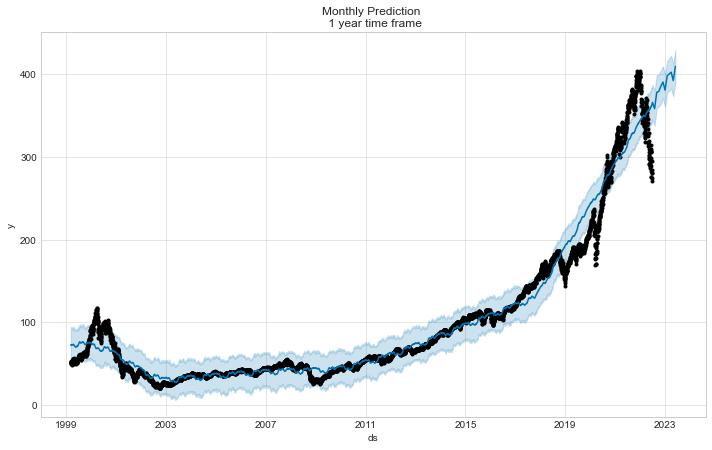

In [31]:
# Monthly Data Predictions
m = Prophet(changepoint_prior_scale=0.01).fit(ph_df)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

plt.show()

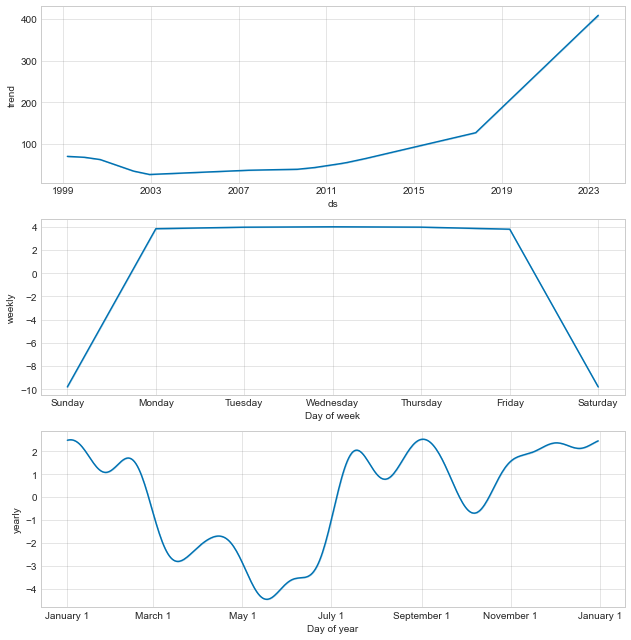

In [20]:
fig = m.plot_components(fcst)
plt.show()

In [21]:
trace = go.Ohlc(x=qqq_df['Date'],
                open=qqq_df['Open'],
                high=qqq_df['High'],
                low=qqq_df['Low'],
                close=qqq_df['Close'],
               increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))

layout = {
    'title': 'QQQ Historical Price',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'ETF Price (USD$)'},
    'shapes': [{
        'x0': '2020-02-20', 'x1': '2020-02-20',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],
    'annotations': [{
        'x': '2020-02-22', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'Covid 19 <br> Pandemic'
    }]
}

data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple_ohlc')